В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



In [359]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [360]:
# Link to process_bank_churn.py: https://github.com/nBeliy-01/Python-ML-course/blob/3eb7d30618f39e1e0666b7cc3a89d9141adcb290/process_bank_churn.py

In [361]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings("ignore")

In [362]:
from process_bank_churn import preprocess_data, preprocess_new_data

In [363]:
raw_df = pd.read_csv('./kaggle/train.csv')

info = preprocess_data(raw_df)

info

{'X_train': array([[ 0.32018724, -0.43549041, -0.9446819 , ..., -0.13183416,
          0.        ,  1.        ],
        [ 0.34783756, -0.43549041,  0.16122721, ..., -0.13183416,
          1.        ,  0.        ],
        [ 0.63816591,  2.13745648, -0.33028795, ..., -0.13183416,
          0.        ,  1.        ],
        ...,
        [-0.5231475 , -0.43549041, -1.06756069, ..., -0.13183416,
          0.        ,  1.        ],
        [-0.95172745, -0.55244411,  0.52986358, ..., -0.13183416,
          0.        ,  1.        ],
        [-1.57385963, -0.43549041, -1.31331827, ..., -0.13183416,
          1.        ,  0.        ]]),
 'y_train': 7180     0.0
 10393    0.0
 80       0.0
 3365     0.0
 12236    0.0
         ... 
 9493     0.0
 8463     0.0
 8143     0.0
 11512    0.0
 9360     0.0
 Name: Exited, Length: 12000, dtype: float64,
 'X_val': array([[ 0.76259235,  2.13745648,  1.02137874, ...,  7.58528743,
          0.        ,  1.        ],
        [-0.91025197, -0.43549041,  0.40

In [364]:
raw_new_df = pd.read_csv('./kaggle/test.csv')

X_test = preprocess_new_data(raw_new_df,  info.get('woe_geography'), info.get('scaler'), info.get('encoder'))
X_test

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,more_than_40_years,range_balance_100_120,is_zero_balance,many_products,Gender_Female,Gender_Male
0,-1.034678,2.137456,-0.944682,-1.087792,1.720173,-1.108193,0.515062,1.016977,0.875226,-0.73259,-0.318945,-1.356305,-0.131834,0.0,1.0
1,-1.490909,-0.435490,0.161227,-0.009376,-0.717950,0.769304,0.515062,1.016977,-1.109098,-0.73259,-0.318945,0.737297,-0.131834,0.0,1.0
2,0.651991,-0.435490,0.652742,1.069040,-0.717950,0.769304,0.515062,-0.983306,0.850584,1.36502,-0.318945,0.737297,-0.131834,0.0,1.0
3,0.804068,-0.552444,0.898500,-0.728320,-0.717950,-1.108193,0.515062,1.016977,1.073044,1.36502,-0.318945,0.737297,-0.131834,0.0,1.0
4,-0.924077,-0.552444,0.652742,1.069040,-0.717950,0.769304,0.515062,1.016977,0.563521,1.36502,-0.318945,0.737297,-0.131834,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.274295,-0.552444,0.038348,1.787983,-0.717950,0.769304,0.515062,1.016977,-1.499416,-0.73259,-0.318945,0.737297,-0.131834,0.0,1.0
9996,0.264887,-0.552444,0.161227,1.428511,-0.717950,0.769304,0.515062,1.016977,0.537890,-0.73259,-0.318945,0.737297,-0.131834,0.0,1.0
9997,1.592102,-0.435490,-0.944682,1.428511,-0.717950,0.769304,0.515062,-0.983306,-2.481612,-0.73259,-0.318945,0.737297,-0.131834,0.0,1.0
9998,-0.882602,-0.435490,0.038348,0.350096,1.700511,-1.108193,0.515062,-0.983306,0.185943,-0.73259,-0.318945,-1.356305,-0.131834,0.0,1.0


Отже, функція написана коректно.

**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [365]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import f1_score
from process_bank_churn import plot_confusion_matrix, plot_roc_curve

X_train = info.get("X_train")
y_train = info.get("y_train")
X_val = info.get("X_val")
y_val = info.get("y_val")

In [366]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

print(f"Train accuracy: {np.round(100 * model.score(X_train, y_train), 2)}%")
print(f"Validation accuracy: {np.round(100 * model.score(X_val, y_val), 2)}%")

Train accuracy: 100.0%
Validation accuracy: 84.3%


Area under ROC score on Train dataset: 100.00000000%


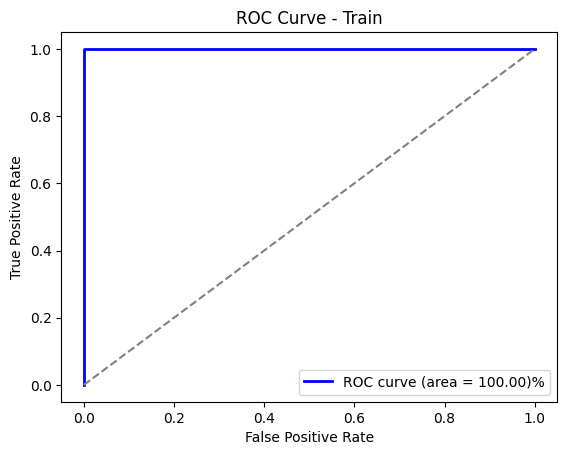

In [367]:
plot_roc_curve(y_train, model.predict_proba(X_train)[:, 1], 'Train')

Area under ROC score on Validation dataset: 77.63186775%


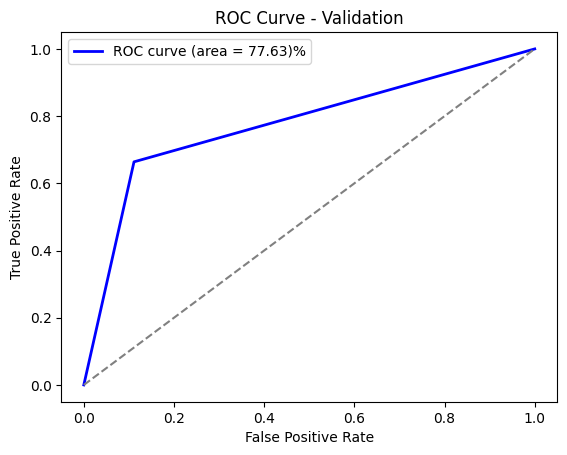

In [368]:
plot_roc_curve(y_val, model.predict_proba(X_val)[:, 1], 'Validation')

In [369]:
print(f"Глибина дерева: {model.get_depth()}")

Глибина дерева: 26


In [370]:
model = DecisionTreeClassifier(random_state=42, max_depth=2)
model.fit(X_train, y_train)

print(f"Train accuracy: {np.round(100 * model.score(X_train, y_train), 2)}%")
print(f"Validation accuracy: {np.round(100 * model.score(X_val, y_val), 2)}%")

Train accuracy: 86.58%
Validation accuracy: 86.1%


Area under ROC score on Train dataset: 84.29075369%


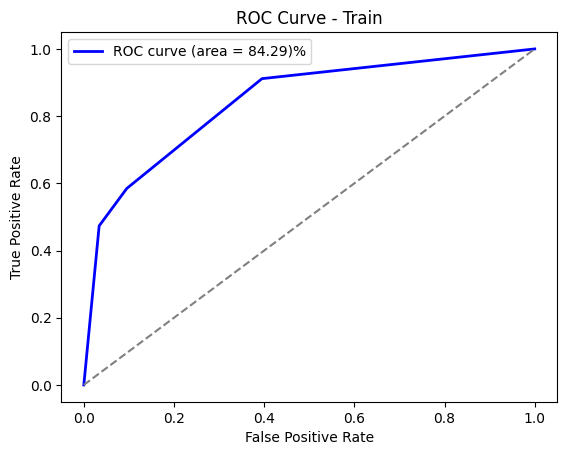

In [371]:
plot_roc_curve(y_train, model.predict_proba(X_train)[:, 1], 'Train')

Area under ROC score on Validation dataset: 84.64963303%


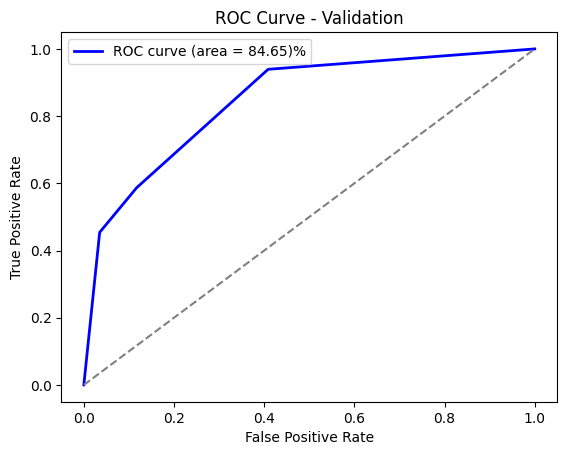

In [372]:
plot_roc_curve(y_val, model.predict_proba(X_val)[:, 1], 'Validation')

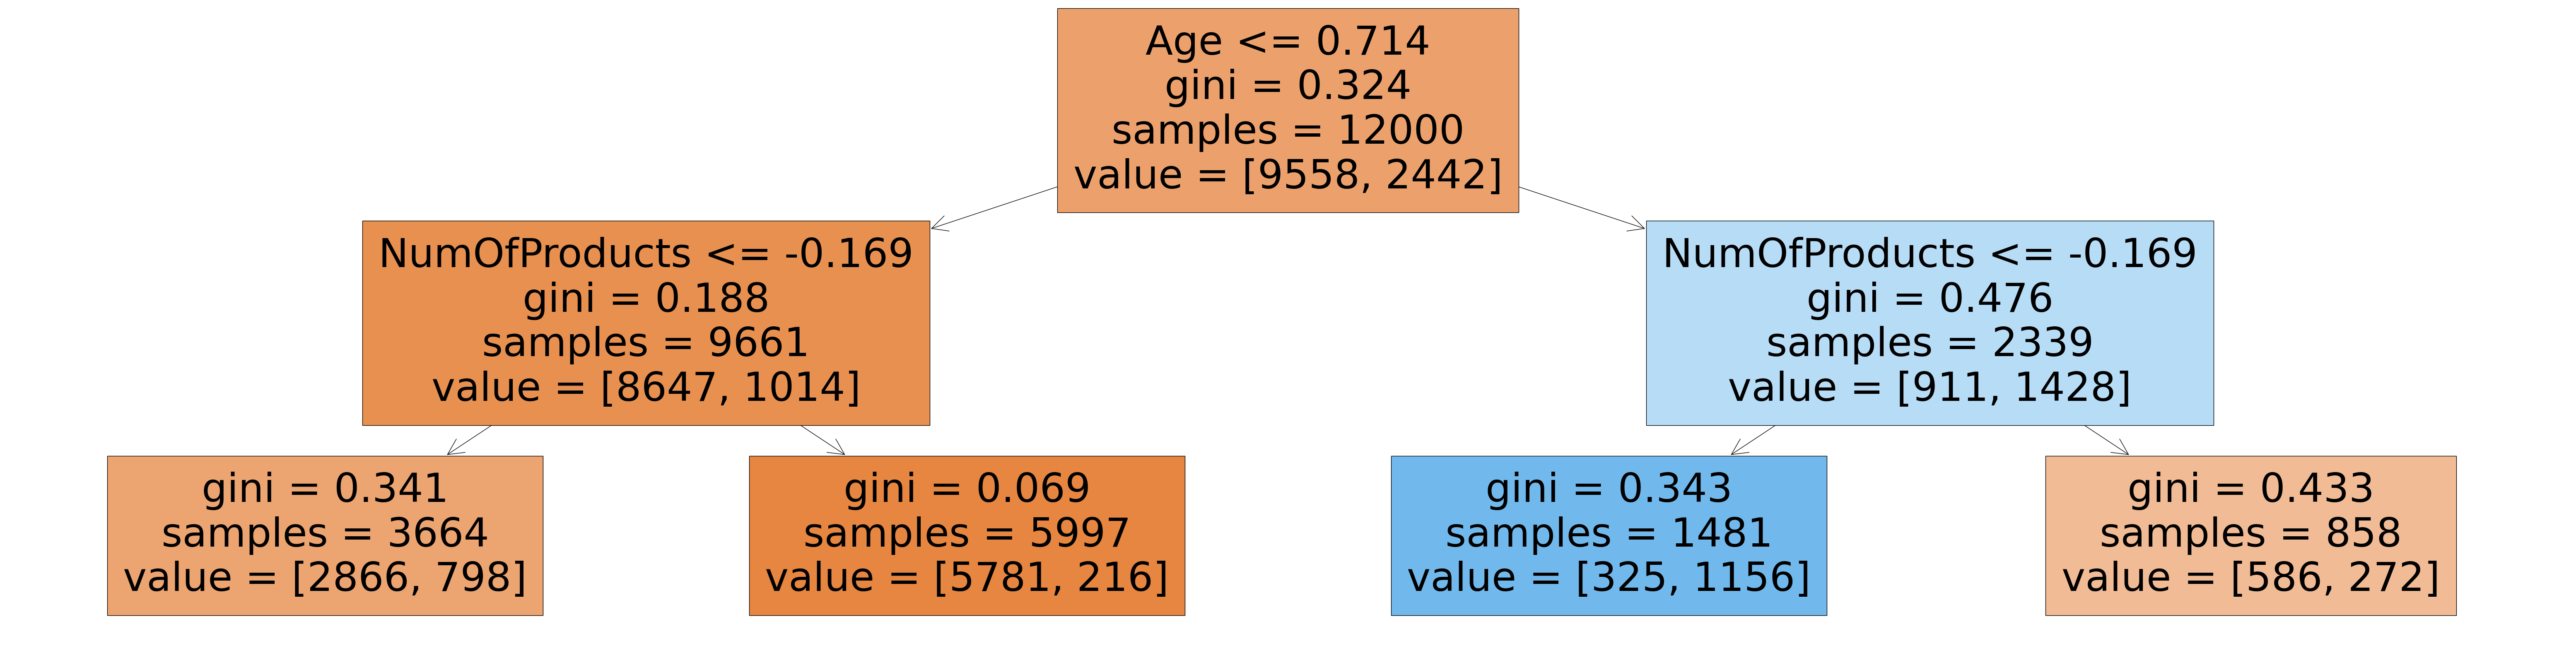

In [373]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=info.get('input_cols'), max_depth=2, filled=True);

In [374]:
importance_df = pd.DataFrame({
    'feature': info.get('input_cols'),
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [375]:
importance_df.head(10)

,feature,importance
2,Age,0.714962
5,NumOfProducts,0.285038
0,CreditScore,0.000000
1,Geography,0.000000
3,Tenure,0.000000
4,Balance,0.000000
6,HasCrCard,0.000000
7,IsActiveMember,0.000000
8,EstimatedSalary,0.000000
9,more_than_40_years,0.000000


Отже, найбільш значущі 2 параметри `Age`, `NumOfProducts`

**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

Train accuracy: 88.15%
Validation accuracy: 87.47%
Area under ROC score on Train dataset: 89.71842070%


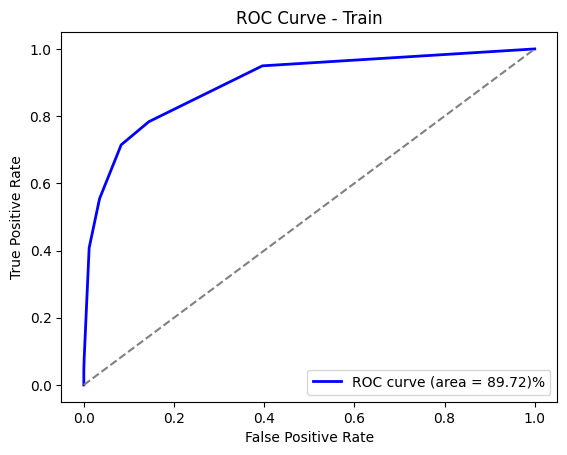

Area under ROC score on Validation dataset: 89.11458262%


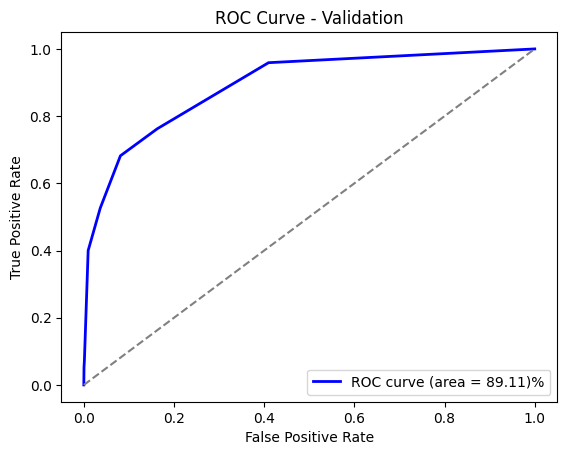

In [376]:
model = DecisionTreeClassifier(random_state=42, max_depth=3)
model.fit(X_train, y_train)

print(f"Train accuracy: {np.round(100 * model.score(X_train, y_train), 2)}%")
print(f"Validation accuracy: {np.round(100 * model.score(X_val, y_val), 2)}%")

plot_roc_curve(y_train, model.predict_proba(X_train)[:, 1], 'Train')
plot_roc_curve(y_val, model.predict_proba(X_val)[:, 1], 'Validation')

Отримали непогані показники AUROC, спробуємо проекспериментувати далі

Train accuracy: 90.33%
Validation accuracy: 89.2%
Area under ROC score on Train dataset: 93.34141323%


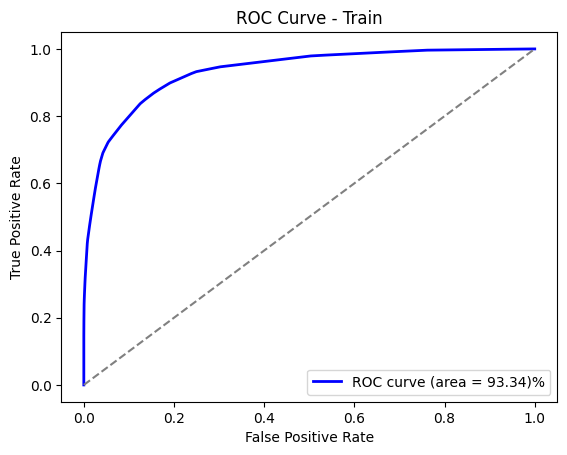

Area under ROC score on Validation dataset: 92.51018588%


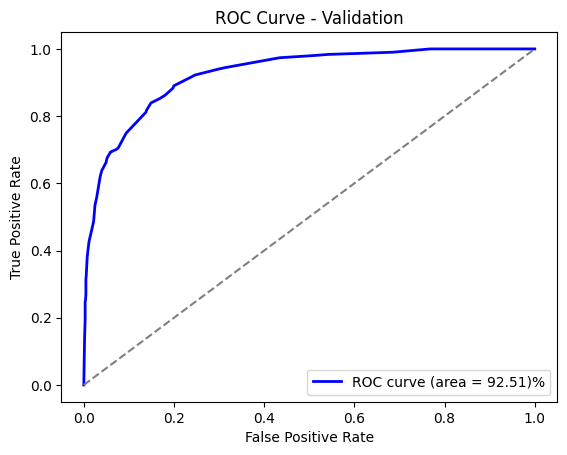

In [377]:
model = DecisionTreeClassifier(random_state=42, max_depth=6, min_samples_leaf=5, max_leaf_nodes=128)
model.fit(X_train, y_train)

print(f"Train accuracy: {np.round(100 * model.score(X_train, y_train), 2)}%")
print(f"Validation accuracy: {np.round(100 * model.score(X_val, y_val), 2)}%")

plot_roc_curve(y_train, model.predict_proba(X_train)[:, 1], 'Train')
plot_roc_curve(y_val, model.predict_proba(X_val)[:, 1], 'Validation')

Протягом декількох ітерацій, отримали непоганий показник, проте ручний підбір параметрів досить складний, тому спробуємо "автоматизувати" це.

**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

In [378]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, y_train)
    train_error = 1 - model.score(X_train, y_train)
    val_error = 1 - model.score(X_val, y_val)
    return {'Max Depth': md, 'Training Error': train_error, 'Validation Error': val_error}

In [379]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

CPU times: user 877 ms, sys: 3.46 ms, total: 880 ms
Wall time: 543 ms


In [380]:
errors_df.style.background_gradient(subset='Validation Error', cmap='Blues_r')

,Max Depth,Training Error,Validation Error
0,1,0.160417,0.177333
1,2,0.134250,0.139000
2,3,0.118500,0.125333
3,4,0.112750,0.118000
4,5,0.104750,0.112667
5,6,0.095917,0.108667
6,7,0.092167,0.109667
7,8,0.081917,0.109667
8,9,0.074000,0.114333
9,10,0.065000,0.118333


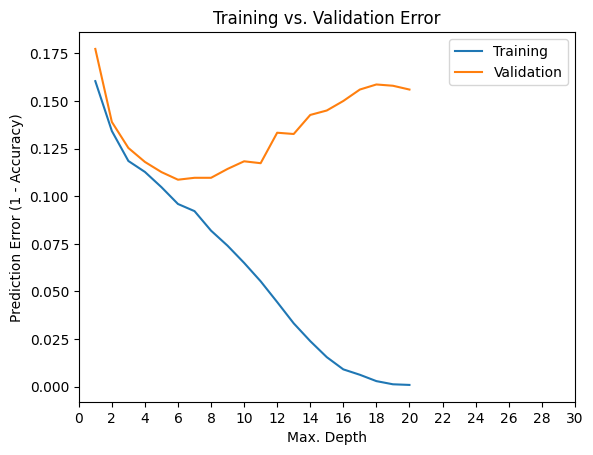

In [381]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0, 31, 2))
plt.xlim(0, 30)  # Встановлює межі осі X до 30
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation']);

Визначили, що з параметром `max_depth` 6,7,8 найменші показники помилки, спробуємо підібрати й інші параметри

In [382]:
def max_leaf_error(md):
    model = DecisionTreeClassifier(max_depth=6, max_leaf_nodes=md, random_state=42)
    model.fit(X_train, y_train)
    train_error = 1 - model.score(X_train, y_train)
    val_error = 1 - model.score(X_val, y_val)
    return {'Max Leaf Nodes': md, 'Training Error': train_error, 'Validation Error': val_error}

In [383]:
%%time
errors_df = pd.DataFrame([max_leaf_error(md) for md in range(2, 200)])

CPU times: user 4.07 s, sys: 5.96 ms, total: 4.08 s
Wall time: 3.81 s


In [384]:
errors_df.style.background_gradient(subset='Validation Error', cmap='Blues_r')

,Max Leaf Nodes,Training Error,Validation Error
0,2,0.160417,0.177333
1,3,0.134250,0.139000
2,4,0.134250,0.139000
3,5,0.127167,0.135667
4,6,0.127167,0.135667
5,7,0.118500,0.125333
6,8,0.118500,0.125333
7,9,0.118500,0.125333
8,10,0.115083,0.121000
9,11,0.109500,0.113333


Визначили, що з параметром `max_depth` 6,7,8 найменші показники помилки, при параметру `max_leaf_nodes` 18-24, 22-23 найменші значення помилок, спробуємо далі:
* `max_leaf_nodes` 18-24, max_depth=6 - error **0.104000**
* `max_leaf_nodes` 18-22, max_depth=7 - error **0.104000**
* `max_leaf_nodes` 22-23, max_depth=8 - error **0.103333**

0.1336666666666667 0.1403333333333333
Area under ROC score on Train dataset: 92.09882713%


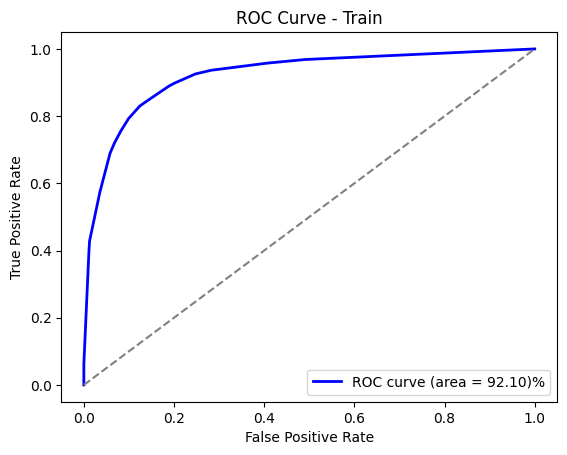

Area under ROC score on Validation dataset: 92.05675972%


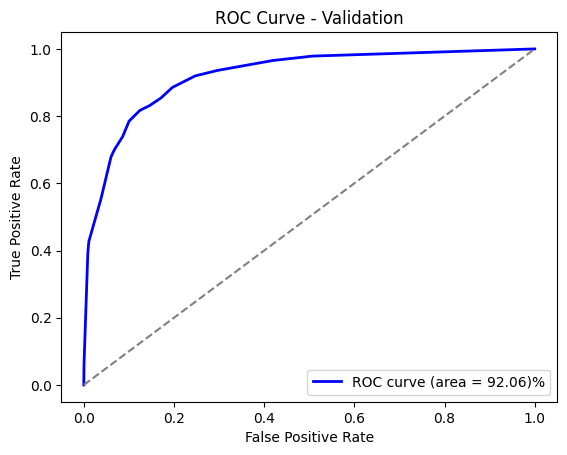

In [385]:
model = DecisionTreeClassifier(max_depth=6, max_leaf_nodes=20, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)
train_error = 1 - model.score(X_train, y_train)
val_error = 1 - model.score(X_val, y_val)

print(train_error, val_error)
plot_roc_curve(y_train, model.predict_proba(X_train)[:, 1], 'Train')
plot_roc_curve(y_val, model.predict_proba(X_val)[:, 1], 'Validation')

На даний момент, це є найкращі показники метрики `AUROC`

**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


Train accuracy: 86.72%
Validation accuracy: 85.33%
Area under ROC score on Train dataset: 93.52794200%


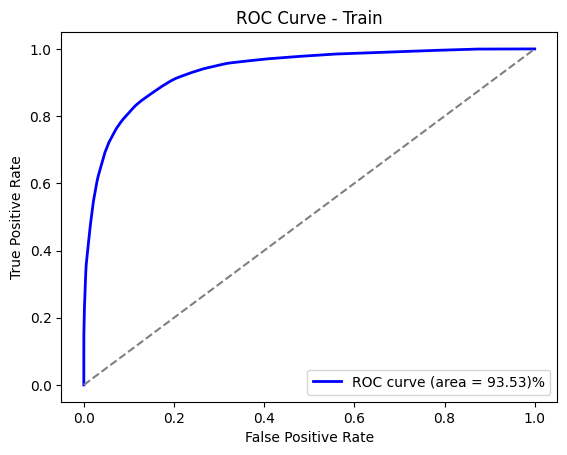

Area under ROC score on Validation dataset: 92.05240414%


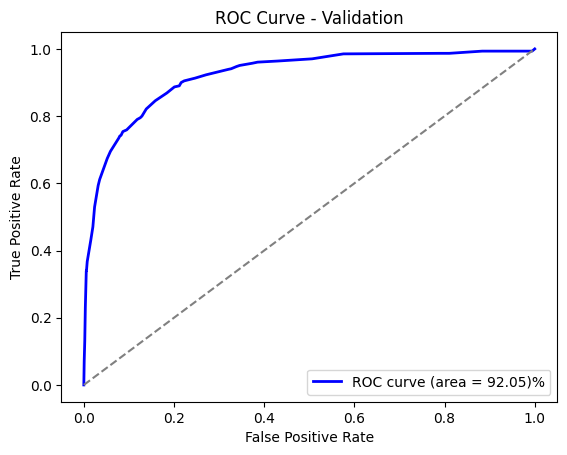

Train accuracy: 72.16%
Validation accuracy: 69.49%


In [398]:
model = DecisionTreeClassifier(max_depth=6, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

print(f"Train accuracy: {np.round(100 * model.score(X_train, y_train), 2)}%")
print(f"Validation accuracy: {np.round(100 * model.score(X_val, y_val), 2)}%")

plot_roc_curve(y_train, model.predict_proba(X_train)[:, 1], 'Train')
plot_roc_curve(y_val, model.predict_proba(X_val)[:, 1], 'Validation')

print(f"Train accuracy: {np.round(100 * f1_score(y_train, model.predict(X_train)), 2)}%")
print(f"Validation accuracy: {np.round(100 * f1_score(y_val, model.predict(X_val)), 2)}%")

Отже, модель виглядає досить непоганою, перенавчання не спостерігається, спробуємо спредиктити дані.

In [401]:
submission = pd.read_csv('./kaggle/sample_submission.csv')

submission['preds'] = model.predict_proba(X_test)[:, 1]
submission[['id', 'preds']].to_csv('./kaggle/submission_decision_tree_1.csv', index=False)